# <b> <center> Final Project - Introduction to Data Science </center> </b>

## <center> Professor: Francisco A. Rodrigues </center>

## <center> Students: </center>
<center> Gildo Gutemberg Alves Oliveira - 11832732 </center>
<center> Gustavo Gabriel Ribeiro - 13672683 </center>
<center> Sofhia de Souza Gonçalves - 11735035 </center>
<center> Victor Paulo Cruz Lutes - 11795512 </center>


# Introduction

This project will delve into an analysis of data that captures perspectives on mental health and the prevalence of mental health conditions within the tech workplace.

Our goal is to build a machine learning model that can answer the following question:
- **Have you sought treatment for a mental health condition?**

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import seaborn as sns
import umap

### Dataset

In [6]:
path = './survey.csv'

# Development

## Getting to know the data

In [4]:
# Opening the dataset
df = pd.read_csv(path, delimiter=',')

In [5]:
# Taking a look on it's content
print(f"Shape: {df.shape}")
df.head()

Shape: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### For understading purposes, we add the colunmns names and description

- **Timestamp**: When the sample was collected
- **Age**: What is your age ?
- **Gender**: What gender do you identify with?
- **Country**: What is your homeland ?
- **state**: If you live in the United States, which state or territory do you live in?
- **self_employed**: Are you self-employed?
- **family_history**: Do you have a family history of mental illness?
- **treatment**: Have you sought treatment for a mental health condition?
- **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees**: How many employees does your company or organization have?
- **remote_work**: Do you work remotely (outside of an office) at least 50% of the time?
- **tech_company**: Is your employer primarily a tech company/organization?
- **benefits**: Does your employer provide mental health benefits?
- **care_options**: Do you know the options for mental health care your employer provides?
- **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- **leave**: How easy is it for you to take medical leave for a mental health condition?
- **mental_health_consequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
- **phys_health_consequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
- **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **mental_health_interview**: Would you bring up a mental health issue with a potential employer in an interview?
- **phys_health_interview**: Would you bring up a physical health issue with a potential employer in an interview?
- **mental_vs_physical**: Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments**: Any additional notes or comments


## Data cleaning

### Some columns are irrelevant to the analysis, thus, can be removed:

- **"Comments"** is irrelevant since we are not doing emotional analysis on text

- **"State"** is only useful when analysing USA residents, we seek a more general analysis

- **"Time stamp"** we do not consider the time when the sample was taken for our analysis


In [ ]:
# Removing unnecessary columns for the analysis
df = df.drop(['comments', 'state', 'Timestamp'], axis= 1)

### Searching for invalid values

In [ ]:
for column_name in df.columns:
    print(column_name, df[column_name].unique())

Age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning andr

### Summarizing genders to 'male', 'female' and 'other'

In [ ]:
female = ['Female','female','Cis Female','F','Woman','f','Femake','woman','Female ','Female (cis)','cis-female/femme','femail']
male = ['Cis Male','M','Male','male','m','Male (CIS)','Male ','Man','msle','cis male','Mail','Malr','maile','Mal','Make','Cis Man']
others = ['Trans-female','something kinda male?','Female (trans)','queer/she/they','non-binary','Nah','All','Enby','fluid','Genderqueer','Androgyne','Agender','Guy (-ish) ^_^',
'male leaning androgynous', 'Trans woman', 'Neuter', 'queer','A little about you','p','ostensibly male, unsure what that really means', 'Male-ish']

In [ ]:
def gender_function(female_list, male_list, gender_name):
    if gender_name in male_list:
        return 'male'
    elif gender_name in female_list:
        return 'female'
    else:
        return 'other'

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x: gender_function(female, male, x))
df['Gender'].unique()

array(['female', 'male', 'other'], dtype=object)

### Fixing null values

In [ ]:
# Searching for the features that contains null values
print(df.isnull().sum())

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


In [ ]:
# Taking a look on how those fields were answered on the form
print(df['self_employed'].unique())
print(df['work_interfere'].unique())

[nan 'Yes' 'No']
['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [ ]:
### Replacing 'nan' values for 'No' and 'Dont Know'
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('Dont Know', inplace=True)

### Searching for invalid age values

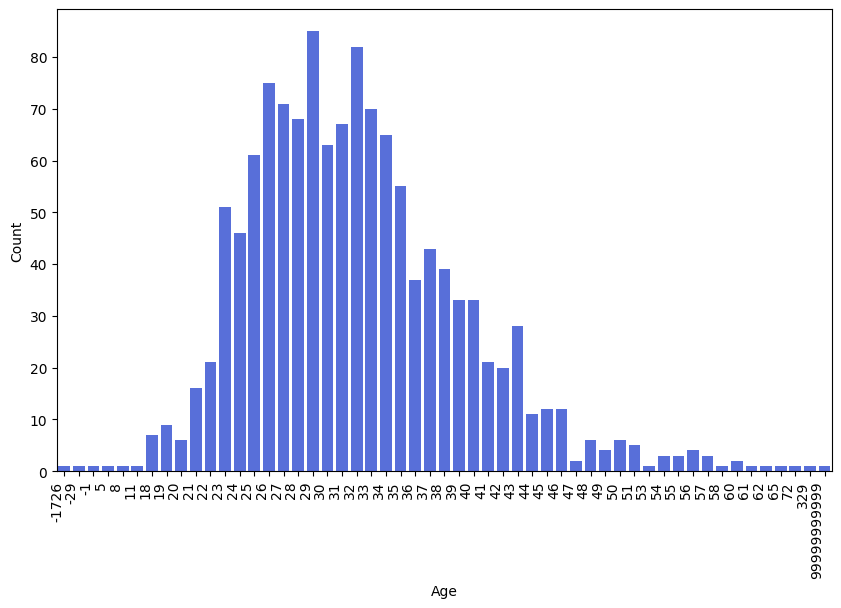

In [ ]:
# Graphically visualizing the distribution of ages present in the dataset
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Age", color='#4361EE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The graph indicates that some individuals incorrectly filled in the age field on the form. To address this issue for classification purposes, certain measures will be taken.

There are 2 possible solutions to this matter:
- Replace invalid values with the average of the column, which is prone to outliers.
- Replace invalid values with the mode of the column.

> To avoid data leakage, we are going to split now the data into a training set and a test set, so we can use only the training data to calculate the mode.

In [ ]:
# 80% to training and 20% to test
train_df, test_df = train_test_split(df, test_size=0.2)

In [ ]:
# Any age value greater than 75 or less than 18 will be substituted by the column's mode
def age_correction(data, age):
    mode_data = data['Age'].mode()[0]
    if age < 18 or age > 75:
        return mode_data
    else:
        return age

In [ ]:
# Replacing in the datasets
df['Age'] = df['Age'].apply(lambda x: age_correction(df, x))
train_df['Age'] = train_df['Age'].apply(lambda x: age_correction(train_df, x))
test_df['Age'] = test_df['Age'].apply(lambda x: age_correction(test_df, x))

In [ ]:
# Checking the results
print(f"List of all the age values present:\n{df['Age'].unique()}")
print(f"Greatest value present: {df['Age'].max()}")
print(f"Lowest value present: {df['Age'].min()}")

List of all the age values present:
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]
Greatest value present: 72
Lowest value present: 18


## Exploratory Data Analysis

> Our visual analysis will precede one-hot encoding and normalization to simplify the process of graphic generation.

### Data per country:

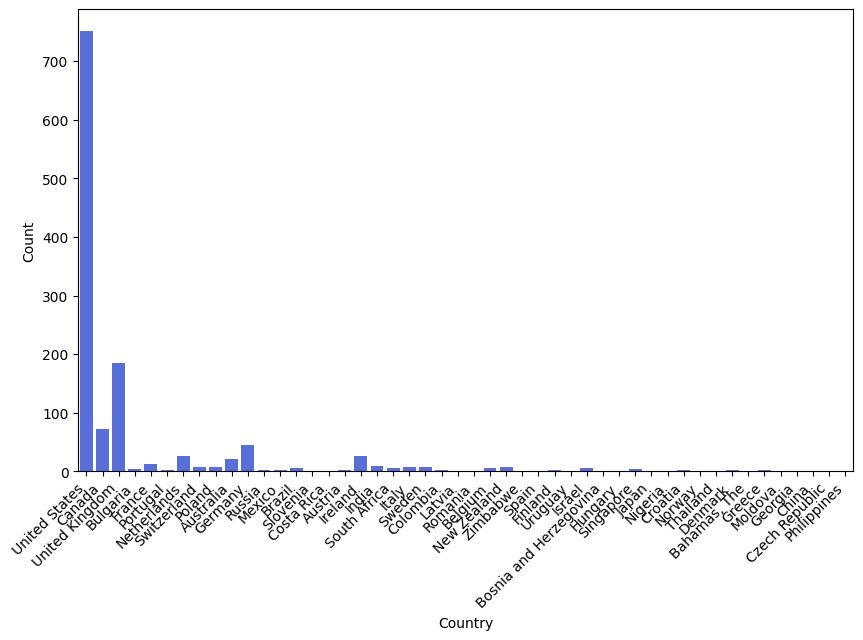

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Country", color = '#4361EE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

The great majority of our data originates from the United States. To maintain the integrity of our analysis and avoid bias, we will limit our focus exclusively to data from the United States.

This approach ensures that our results are representative and reliable for this specific demographic.

In [ ]:
# Changing the currently used dataset to contain only United States samples
df.drop(df[df['Country']!="United States"].index, inplace=True)
test_df.drop(test_df[test_df['Country']!="United States"].index, inplace=True)
train_df.drop(train_df[train_df['Country']!="United States"].index, inplace=True)
df.drop('Country', axis=1, inplace=True)
test_df.drop('Country', axis=1, inplace=True)
train_df.drop('Country', axis=1, inplace=True)

> Now, we we will explore our data per different attributes

### Number of people who sought treatment vs Number of people who didn't

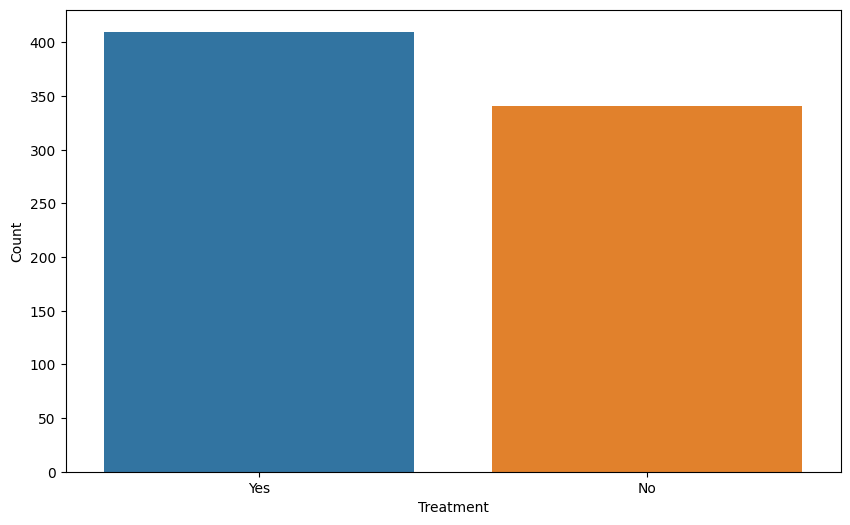

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="treatment")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.show()

By a small margin, more people have sought for treament than not in our dataset

### People that sought treatment - per gender

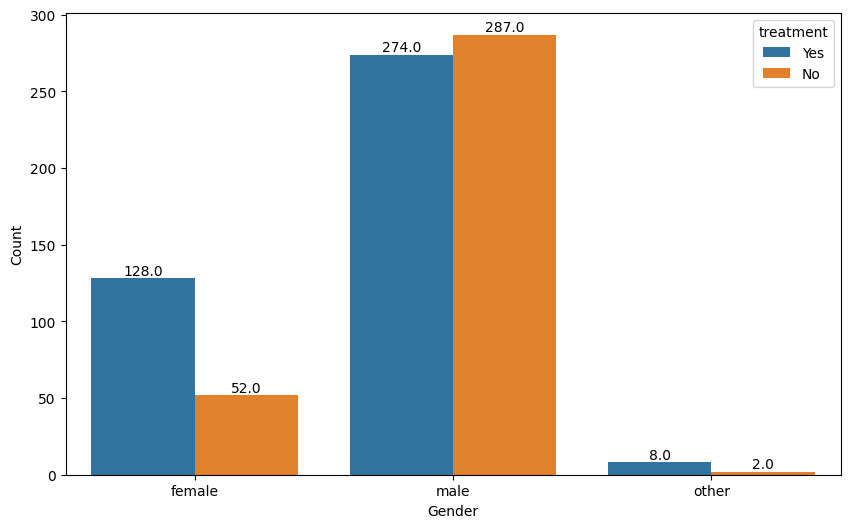

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="Gender", hue='treatment')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Apparently, men are significantly more likely to seek treatment for mental health problems and, in contrast to other genders and women, those who do not seek treatment are the majority overall.

### People that sought treatment - per type of work

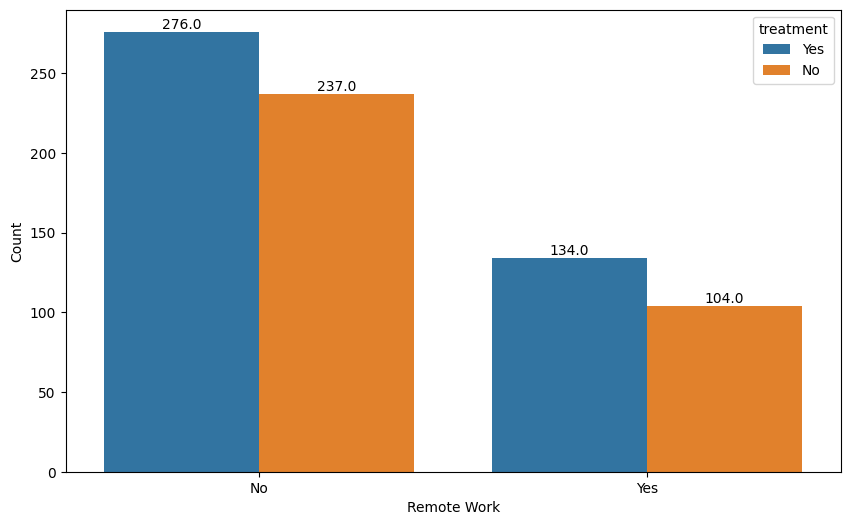

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="remote_work", hue='treatment')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.show()

In general, most of those who seek treatment for mental health problems and those who do not, work in person.

### People that sought treatment - per age

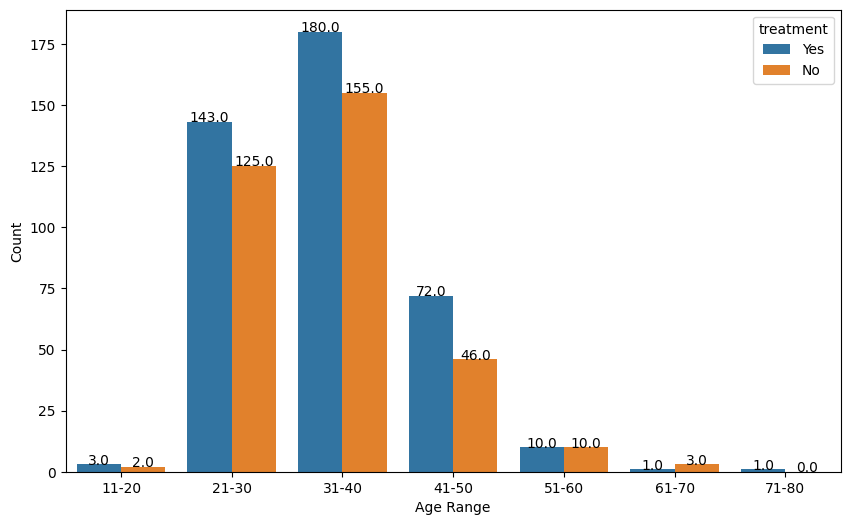

In [ ]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Age Range", hue='treatment', order=labels)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

df.drop("Age Range", axis=1, inplace=True)

We can observe that the age group between 21 and 50 years old is when there is a greater intensity of problems related to mental health.

### People that sought treatment - per family history

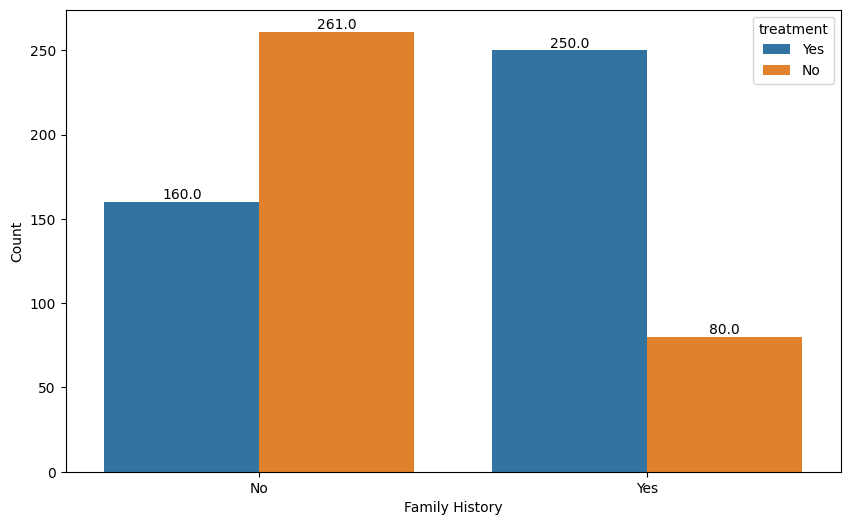

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="family_history", hue='treatment')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel("Family History")
plt.ylabel("Count")
plt.show()

We can see that individuals with a family history of mental illness are significantly more inclined to seek treatment compared to those without such a background.

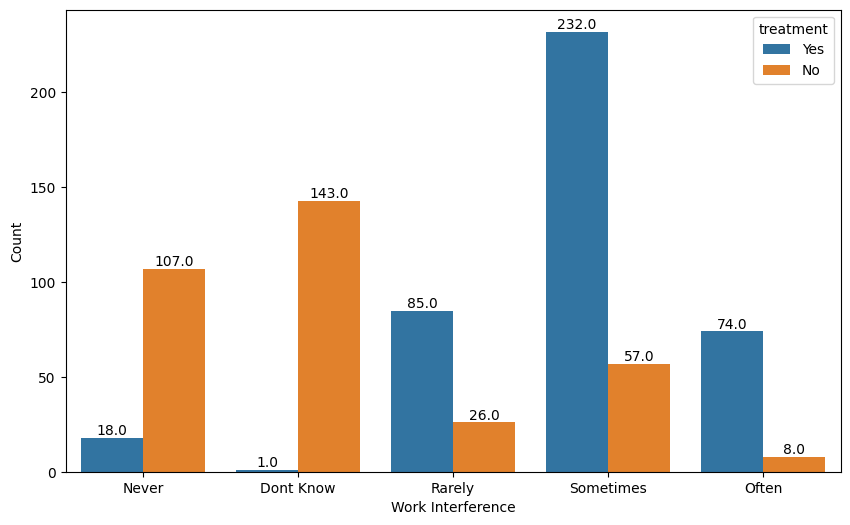

In [ ]:
plt.figure(figsize=(10, 6))
labels = ["Never", "Dont Know", "Rarely", "Sometimes", "Often"]

ax = sns.countplot(data=df, x="work_interfere", hue='treatment', order=labels)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xlabel("Work Interference")
plt.ylabel("Count")
plt.show()

We can observe that individuals who believe their mental illness interferes with their work are more likely to sought for treatment.

## Replacing categorical values with numeric values

### We will use One Hot Encoding to convert the categorical values of some features into numerical values

In [ ]:
# Features that will be split by One Hot Enconding
to_oneHotEnconding = ["self_employed", "family_history", "remote_work", "tech_company", "obs_consequence",
                      "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "mental_health_consequence",
                      "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview", "mental_vs_physical", "Gender"]

In [ ]:
df = pd.get_dummies(df,columns=to_oneHotEnconding)
train_df = pd.get_dummies(train_df,columns=to_oneHotEnconding)
test_df = pd.get_dummies(test_df,columns=to_oneHotEnconding)

In [ ]:
# Observing the results
df.head()

,Age,treatment,work_interfere,no_employees,leave,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,remote_work_No,...,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender_female,Gender_male,Gender_other
0,37,Yes,Often,6-25,Somewhat easy,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
1,44,No,Rarely,More than 1000,Don't know,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
4,31,No,Never,100-500,Don't know,1,0,1,0,0,...,1,0,0,1,1,0,0,0,1,0
5,33,No,Sometimes,6-25,Don't know,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
6,35,Yes,Sometimes,1-5,Somewhat difficult,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


### Replacing the intensity meaning values of some features with numeric values

In [ ]:
# Replace with intensity
intensity_features = ["work_interfere", "no_employees", "leave", "Age Range"]

# Mapping the possible values to a certain number
work_interfere_intesity = {'Never':1 , 'Rarely':2, 'Dont Know':3, 'Sometimes':4, 'Often':5}
no_employees_intesity = {'1-5':1, '6-25':2, '26-100':3, '100-500':4, '500-1000':5, 'More than 1000':6}
leave_intesity = {'Don\'t know':1, 'Very difficult':2, 'Somewhat difficult':3, 'Somewhat easy':4, 'Very easy':5}

In [ ]:
def replace_toIntensity(data):
    data['work_interfere'] = data['work_interfere'].replace(work_interfere_intesity)
    data['no_employees'] = data['no_employees'].replace(no_employees_intesity)
    data['leave'] = data['leave'].replace(leave_intesity)

In [ ]:
replace_toIntensity(df)
replace_toIntensity(train_df)
replace_toIntensity(test_df)

In [ ]:
# Observing the results
print('work_interfere', df['work_interfere'].unique())
print('no_employees', df['no_employees'].unique())
print('leave', df['leave'].unique())
df.head()

work_interfere [5 2 1 4 3]
no_employees [2 6 4 1 3 5]
leave [4 1 3 2 5]


,Age,treatment,work_interfere,no_employees,leave,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,remote_work_No,...,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender_female,Gender_male,Gender_other
0,37,Yes,5,2,4,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
1,44,No,2,6,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
4,31,No,1,4,1,1,0,1,0,0,...,1,0,0,1,1,0,0,0,1,0
5,33,No,4,2,1,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
6,35,Yes,4,1,3,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


## Normalization and PCA visualization

In [ ]:
# Dividing our dataset into two groups, training and testing, 'X' contains the features and 'y' the target feature values

X_train = train_df.drop(axis=1, columns=['treatment'])
y_train = train_df['treatment']

X_test = test_df.drop(axis=1, columns=['treatment'])
y_test = test_df['treatment']

Let's normalize our data

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X_train, axis = 0))
print('Desvio Padrao:', np.std(X_train, axis = 0))

print('Dados transformados:')
print('Media: ', np.mean(X_test, axis = 0))
print('Desvio Padrao:', np.std(X_test, axis = 0))

Dados transformados:
Media:  [-4.07204724e-16  2.36060710e-17  1.18030355e-16 -8.85227661e-17
 -3.98352447e-17 -2.95075887e-18 -6.63920746e-17  6.63920746e-17
 -3.39337270e-17 -2.13930018e-17 -1.18030355e-17  1.18030355e-17
 -1.00325802e-16 -1.77045532e-17 -4.42613830e-17  2.95075887e-18
  1.69668635e-16  1.77045532e-17 -1.18030355e-17  1.47537943e-17
 -4.13106242e-17 -1.09178078e-16  3.24583476e-17  2.36060710e-17
  4.72121419e-17 -3.83598653e-17  1.18030355e-17  1.77045532e-17
 -4.42613830e-17 -2.36060710e-17 -5.60644185e-17  4.72121419e-17
 -2.06553121e-17  1.23931873e-16 -3.68844859e-17 -5.90151774e-18
  1.18030355e-17  1.47537943e-17  2.95075887e-17 -1.18030355e-17
 -6.19659363e-17  4.72121419e-17  1.18030355e-16 -1.18030355e-17
  6.49166951e-17 -1.28358011e-16 -3.83598653e-17  4.13106242e-17
 -4.42613830e-17 -8.85227661e-17  1.77045532e-17 -8.85227661e-17
  2.36060710e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1

We ended up with more than 50 features, which could make it harder for our model to achieve good accuracy. To address this, we can use PCA (Principal Component Analysis) to reduce the dimensionality.

First, let's identify the attributes that represent 95% of the variance in our problem.

In [ ]:
def pca_variance(data):

    pca = PCA()
    scaler = StandardScaler()
    data_s = scaler.fit_transform(data)
    X_reduced = pca.fit_transform(data_s)

    var = pca.explained_variance_ratio_
    cum_sum = pca.explained_variance_ratio_.cumsum()

    i_95 = 0
    var_sum95 = 0
    for i, variance_sum in enumerate(cum_sum):
        if variance_sum > 0.95:
            i_95=i
            var_sum95 = variance_sum
            break

    plt.figure(figsize=(5,3))
    plt.plot(2, cum_sum[1], marker='s', color='green', label=f'{round(cum_sum[1]*100,1)}%(PCA{2})')
    plt.plot(i_95, var_sum95, marker='s', color='darkred', label=f'{round(var_sum95*100,1)}%(PCA{i_95})')
    plt.plot(range(1, data.shape[1]+1), cum_sum, color='tomato', label='Cumulative Variance')
    plt.bar(range(1, data.shape[1]+1), var, label='Explained Variance')
    plt.legend()
    plt.xlabel('Principle Components')
    plt.title('Explained Variance')

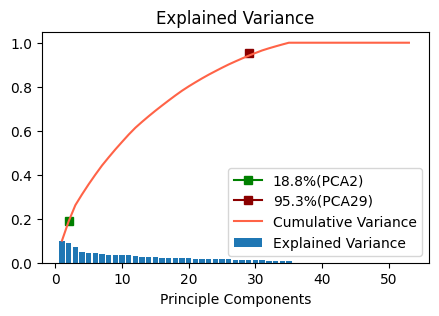

In [ ]:
pca_variance(X_train)

In the graphic above, we observe that to achieve 95% of the variance, we need 29 components, a significant reduction from the original 54.

Let's proceed with our PCA accordingly.

In [ ]:
def pca(data, label, label_name1="Yes", label_name2="No",leg_name="treatment",figsize=(6, 4)):
    scaler = StandardScaler()
    data_s = scaler.fit_transform(data)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data_s)

    # Visualization of 2 components only
    scatter_fig = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=label, style=label)

    scatter_fig.set(title='PCA Visualization', xlabel='PC1', ylabel='PC2')

    handles, labels = scatter_fig.get_legend_handles_labels()
    scatter_fig.legend(title=leg_name, labels=[label_name1, label_name2])

    plt.show(scatter_fig)

    return X_pca

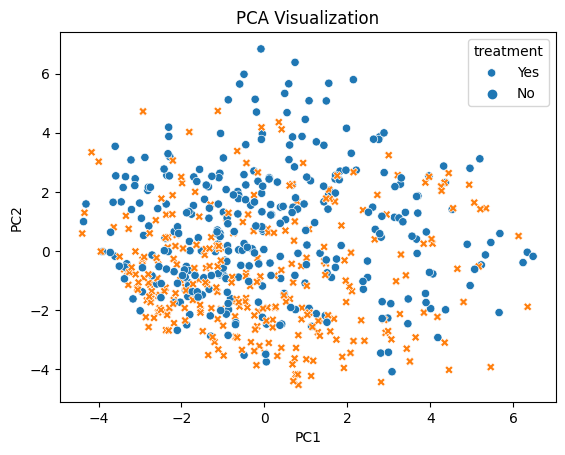

In [ ]:
X_pca = pca(X_train, y_train, 'Yes', 'No')

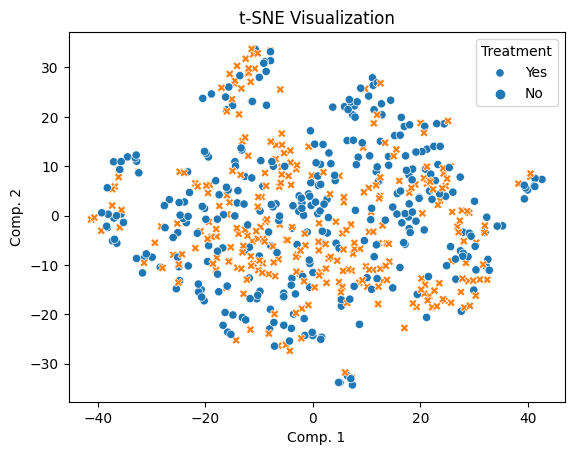

In [ ]:
def visualization_tsne(data, label, label_name1="Yes", label_name2="No",leg_name="Treatment", figsize=(6, 4), perplexity = None):
    scaler = StandardScaler()
    data_s = scaler.fit_transform(data)

    if perplexity == None:
        perplexity = int((data_s.shape[0])**0.5)
    tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=perplexity, n_iter=1000)
    Xs_tsne = tsne.fit_transform(data_s)

    scatter_fig = sns.scatterplot(x=Xs_tsne[:, 0], y=Xs_tsne[:, 1], hue=label, style=label)
    scatter_fig.set(title='t-SNE Visualization', xlabel='Comp. 1', ylabel='Comp. 2')
    handles, labels = scatter_fig.get_legend_handles_labels()
    scatter_fig.legend(title=leg_name, labels=[label_name1, label_name2])

    plt.show(scatter_fig)

visualization_tsne(X_train, y_train, perplexity=25)

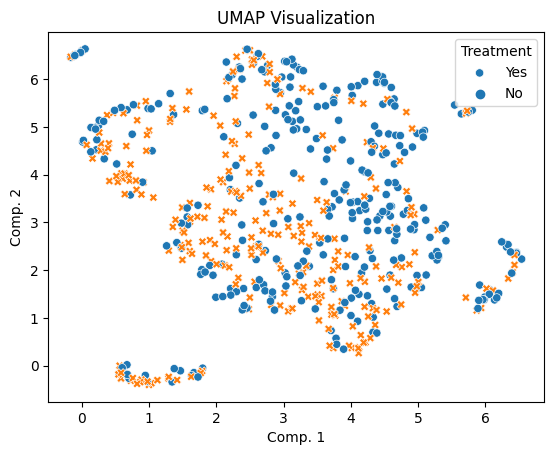

In [ ]:
def visualization_umap(data, label, label_name1="Yes", label_name2="No",leg_name="Treatment", figsize=(6, 4), n_neighbors=15, min_dist=0.1, metric='euclidean'):
    scaler = StandardScaler()
    data_s = scaler.fit_transform(data)

    umap_model = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric
    )

    Xs_umap = umap_model.fit_transform(data_s)

    scatter_fig = sns.scatterplot(x=Xs_umap[:, 0], y=Xs_umap[:, 1], hue=label, style=label)
    scatter_fig.set(title='UMAP Visualization', xlabel='Comp. 1', ylabel='Comp. 2')
    handles, labels = scatter_fig.get_legend_handles_labels()
    scatter_fig.legend(title=leg_name, labels=[label_name1, label_name2])

    plt.show(scatter_fig)

visualization_umap(X_train, y_train)

The visualizations did not exhibit a clear separation between classes in two dimensions using the three employed techniques: PCA, t-SNE, and UMAP. While PCA is a simpler technique, t-SNE and UMAP represent the state of the art in dimensionality reduction. This underscores the complexity of the problem, as even with the use of robust and modern techniques, we did not achieve as distinct results as desired.

## Correlation matrix

In [ ]:
correlation_matrix = df.corr()

<ipython-input-110-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Visualizing the correlation matrix can be very useful in exploratory data analysis and provide interesting insights, however, as we changed all categorical values to numeric values in our dataset (in the previous steps), visualization of the matrix becomes difficult due to the large number of features. See:

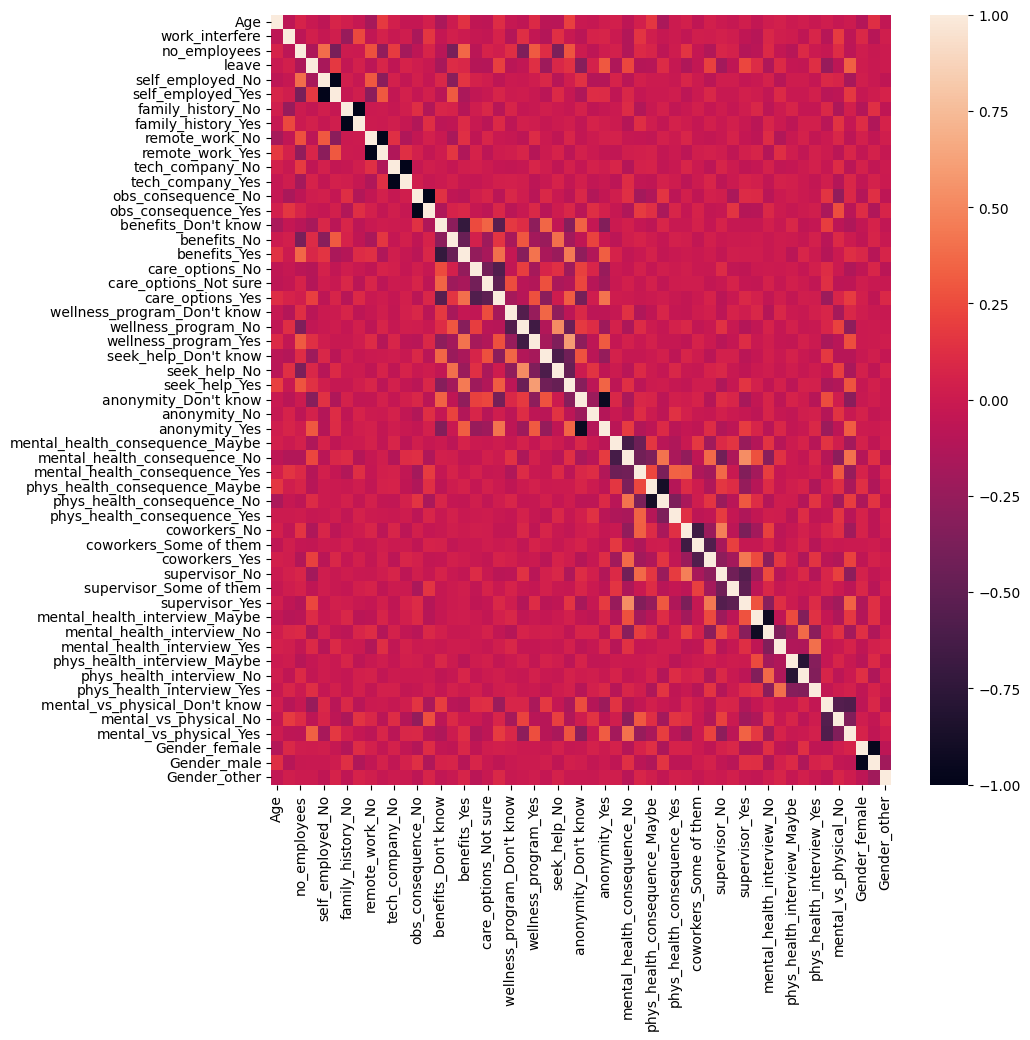

In [ ]:
plt.figure(figsize= (10, 10))
sns.heatmap(correlation_matrix)
plt.show(sns)

Thus, we will extract the values of the correlation coefficients for a better analysis

In [ ]:
corr_coeficients = correlation_matrix.unstack()
corr_coeficients = corr_coeficients[(corr_coeficients != 1.0) & (corr_coeficients != -1.0)]
corr_coeficients = corr_coeficients.drop_duplicates()
corr_coeficients_sorted = corr_coeficients.sort_values(ascending=False)
print(corr_coeficients_sorted.nlargest(5))

wellness_program_Yes          seek_help_Yes     0.597463
mental_health_consequence_No  supervisor_Yes    0.531027
wellness_program_No           seek_help_No      0.518743
coworkers_No                  supervisor_No     0.462513
benefits_Yes                  seek_help_Yes     0.441635
dtype: float64



Observing the values of the 5 largest correlation coefficients, we were able to extract some interesting insights:

Analyzing from top to bottom, we have:

1. Employees are more likely to seek help when there is an atmosphere that encourages their well-being

2. Employees who are willing to discuss mental health issues with their supervisors, as expected, believe that this action will not have a negative consequence

3. In contrast to the first observation made, in environments not conducive to employee well-being, employees tend not to seek help

4. Interestingly, employees who are not willing to discuss a mental health issue with their direct supervisor are not as willing to discuss it with their coworkers

5. Employees who have Employers that offer benefits regarding mental well-being tend to seek more help



# Classification

After preprocessing, our dataset is ready for classification model training. Our strategy involves:

1. Implementing various classifiers with basic parameters to obtain an initial understanding of their performances. Cross-validation will be employed for robust evaluation and better generalization across different data configurations.

2. Based on the results, identifying the model showing the most promise in terms of accuracy and generalization capability.

3. Utilizing Grid Search to explore different hyperparameter combinations and optimize the selected model's performance.

4. Identifying the best hyperparameter sets to maximize effectiveness in the classification task.

In [ ]:
# Number of folds
n_cv = 5

## Classifiers with basic parameters

### Random Forest

In [ ]:
model=RandomForestClassifier(n_estimators=100)
cv = cross_validate(model, X_train, y_train, cv=n_cv)
print('Random Forrest Accuracy:', cv['test_score'].mean())

Random Forrest Accuracy: 0.7381609195402299


### K-nearest neighbors

In [ ]:
model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
cv = cross_validate(model, X_train, y_train, cv=n_cv)
print('KNN Accuracy:', cv['test_score'].mean())

KNN Accuracy: 0.6036781609195401


### Bayesian

In [ ]:
model = GaussianNB()
cv = cross_validate(model, X_train, y_train, cv=n_cv)
print('GaussianNB Accuracy:', cv['test_score'].mean())

GaussianNB Accuracy: 0.4627586206896551


### Logistic regression

In [ ]:
model = LogisticRegression(random_state=0)
cv = cross_validate(model, X_train, y_train, cv=n_cv)
print('LogisticRegression Accuracy:', cv['test_score'].mean())

LogisticRegression Accuracy: 0.6777011494252874


### Multi-layer Perceptron

In [ ]:
model = MLPClassifier(random_state=1, max_iter=1000)
cv = cross_validate(model, X_train, y_train, cv=n_cv)
print('MLPClassifier Accuracy:', cv['test_score'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Accuracy: 0.684367816091954


## Improving parameters of Random Forest Classifier using Grid Search

In [ ]:
randomForrest = RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = GridSearchCV(estimator=randomForrest, param_grid=param_grid, cv=n_cv,
                    scoring='roc_auc', return_train_score=False, verbose=1)

model.fit(X_train, y_train)

best_model = model.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
best_params = model.best_params_

print(f'Accuracy: {accuracy}')
print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Accuracy: 0.7919463087248322
Best Parameters: {'bootstrap': False, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 40}


## Analysing some metrics of the trained model

### Confusion Matrix

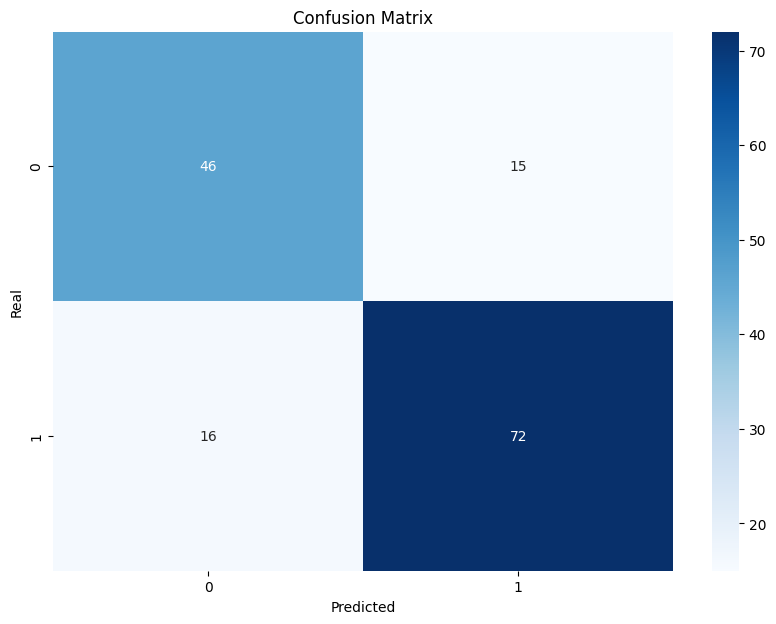

              precision    recall  f1-score   support

          No       0.74      0.75      0.75        61
         Yes       0.83      0.82      0.82        88

    accuracy                           0.79       149
   macro avg       0.78      0.79      0.79       149
weighted avg       0.79      0.79      0.79       149



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

print(classification_report(y_test, y_pred))

The model demonstrates a balanced performance across both the 'No' and 'Yes' categories, as indicated by the precision, recall, and F1-score metrics. For the 'No' category, the model has a precision of 0.74 and a recall of 0.75, resulting in an F1-score of 0.75. This suggests that the model is slightly better at identifying true negatives (correctly predicting 'No') than it is at avoiding false positives (incorrectly predicting 'Yes').

For the 'Yes' category, the model shows a slightly higher precision of 0.83 and a recall of 0.82, leading to an F1-score of 0.82. This indicates that the model is more accurate in predicting true positives (correctly predicting 'Yes') and is also quite adept at minimizing false negatives (failing to predict 'Yes').

### Most important features to the classification made

Identifying which features are most relevant to whether people seek help for mental problems or not can be very significant, as this makes it possible to identify a more specific target of study and analysis on which possible changes should be focused.

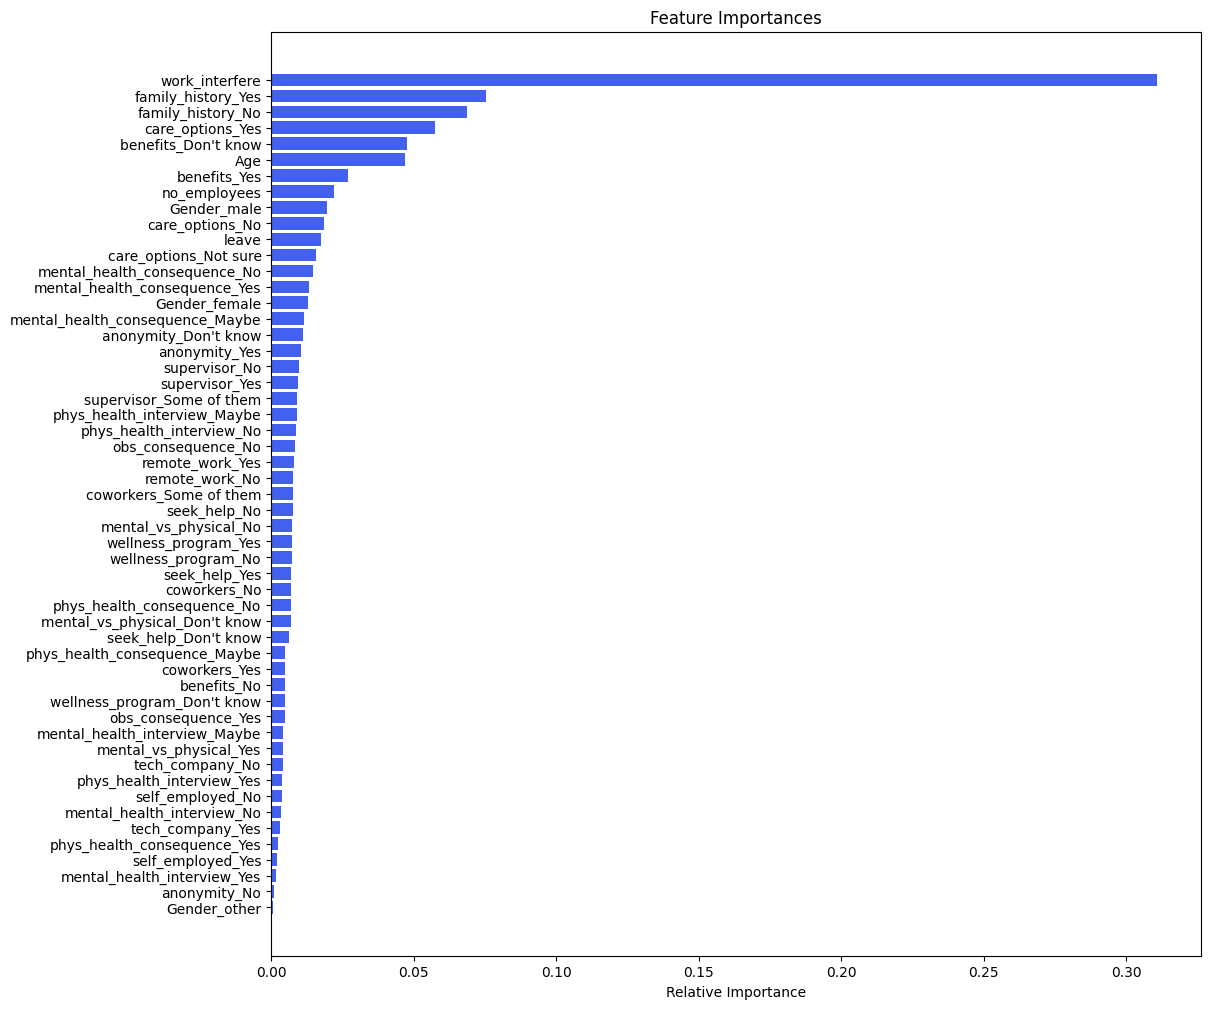

In [ ]:
importances = best_model.feature_importances_

feature_names = df.columns.tolist()
feature_names.remove('treatment')
feature_names

indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="#4361EE", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Looking at the graph, we see, without a doubt, that the metric that most contributes to whether or not people seek help to their mental health is how this action would affect them in their work.

## Classifier with PCA

In [ ]:
n_cv = 10

best_n = 2
best_acc = 0
for n_components in range(2,53):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)

    model=RandomForestClassifier(n_estimators=100,  random_state=3)
    cv = cross_validate(model, X_train_pca, y_train, cv=n_cv)
    if cv['test_score'].mean() > best_acc:
        best_acc = cv['test_score'].mean()
        best_n = n_components

print(best_n, best_acc)

28 0.7539890710382513


In [ ]:
randomForrest = RandomForestClassifier()

pca = PCA(n_components=best_n)
X_train_pca = pca.fit_transform(X_train)
n_cv = 10

param_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = GridSearchCV(estimator=randomForrest, param_grid=param_grid, cv=n_cv,
                    scoring='roc_auc', return_train_score=False, verbose=1)

model.fit(X_train_pca, y_train)

best_model = model.best_estimator_

X_test_pca = pca.transform(X_test)
y_pred = best_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
best_params = model.best_params_

print(f'Accuracy: {accuracy}')
print(f'Best Parameters: {best_params}')

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Accuracy: 0.7181208053691275
Best Parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


The high dimensionality of the problem prompted the use of PCA to assess whether accuracy could be improved by tackling the curse of dimensionality. However, the results indicated that, even with a significant reduction in the number of dimensions, the classification performance was inferior to that achieved without dimensionality reduction.

# Conclusion and results interpretation

The problem "Have you sought treatment for a mental health condition?" proved to be quite challenging. Employing some of the well-established algorithms and optimizing through grid search, we achieved an accuracy of 79%, a reasonably good precision rate.

To enhance this work in the future, we may explore the use of additional algorithms from the literature and experiment with other hyperparameter optimization methods.

Regarding the data itself, we observed that almost all questions were categorical. It would be interesting to conduct a new survey with a broader variety of question types and interview a larger number of people. Given that the current sample was less than 1000 people, achieving 79% accuracy is indeed a commendable result.